### Import CSV file and set max column and rows to read when calling Data Frame

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv(r'C:\Users\a890870\OneDrive - Atos\Desktop\Glassdoor project\Cleaned_DS_Jobs.csv')
df.head()


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,137,171,154,NY,1,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),137,171,154,VA,0,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),137,171,154,MA,1,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),137,171,154,MA,0,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,137,171,154,NY,1,22,1,1,0,0,0,0,0,data scientist,na


### Change The Name Of  "Size" Column To "Number Of Employees' And Cleaning The Column 

In [5]:
df.rename(columns={'Size': 'Number of employees'}, inplace=True)

### Clean The "Number Of Employees" Column 

In [24]:
df['Number of employees'] = df['Number of employees'].str.replace('employees', '', regex=True)
df['Number of employees'] = df['Number of employees'].str.replace('to', '', regex=True)
df['Number of employees'] = df['Number of employees'].str.replace('10000+', '10000', regex=False)
df['Number of employees'] = df['Number of employees'].str.replace('Unknown', '0', regex=False)
df['Number of employees'] = df['Number of employees'].str.replace('-1', '0', regex=False)
df['Number of employees'] = df['Number of employees'].str.replace(r'\s+', '-', regex=True)
df['Number of employees'] = df['Number of employees'].str.rstrip('-')



### Creating A Midpoint Column From "Numbers of employees"  Column As One Number For Future Calculations  

In [23]:
%%capture
import pandas as pd

# Sample DataFrame
data = {'Number of employees': ['51 200', '1001 5000', '1 50', '201 500', '10000', '501 1000', '5001 10000', '0']}
df_test = pd.DataFrame(data)

# Function to calculate the midpoint of a range
def calculate_midpoint(range_str):
    # Split the range string into numbers
    values = range_str.split()
    if len(values) == 1:
        # If there's only one value, return it as an integer
        return int(values[0])
    else:
        # Calculate the midpoint if there are two values
        start, end = map(int, values)
        midpoint = (start + end) // 2
        return midpoint

# Create a new DataFrame 'midpoint_df' to store the midpoint values
midpoint_df = pd.DataFrame()
midpoint_df['Number of employees midpoint'] = df['Number of employees'].apply(calculate_midpoint)

# Convert the 'Number of employees midpoint' column to int
midpoint_df['Number of employees midpoint'] = midpoint_df['Number of employees midpoint'].astype(int)

# Add the 'Number of employees midpoint' column to the original 'df'
df['Number of employees midpoint'] = midpoint_df['Number of employees midpoint']



### Creating New Column Called "Salary Midpoint" From The Column "Salary Estimate"

In [9]:
# Function to calculate midpoint for salary range
def calculate_midpoint(salary_range):
    min_salary, max_salary = map(int, salary_range.split('-'))
    return (min_salary + max_salary) // 2

# Create a new column 'Salary Midpoint' in the DataFrame
df['Salary Midpoint'] = df['Salary Estimate'].apply(calculate_midpoint)

### What Are The Best 10 Companies To Work For ?

In [10]:
# Find the top 10 companies by maximum rating and salary midpoint
best_10_companies = df.groupby('Company Name').agg({'Rating': 'max', 'Salary Midpoint': 'max'}).nlargest(10, columns=['Rating', 'Salary Midpoint'])

# Print the top 10 companies
print(best_10_companies)



                            Rating  Salary Midpoint
Company Name                                       
Blue Horizon Tek Solutions     5.0              271
Kollasoft Inc.                 5.0              185
Cohere Health                  5.0              183
PROPRIUS                       5.0              161
Royce Geospatial               5.0              161
LifeOmic                       5.0              148
ChaTeck Incorporated           5.0              136
Averity                        5.0              134
Phoenix Operations Group       5.0              134
Jobot                          5.0              120


### Vizualization For Top 10 Comapnies And Their Cector 


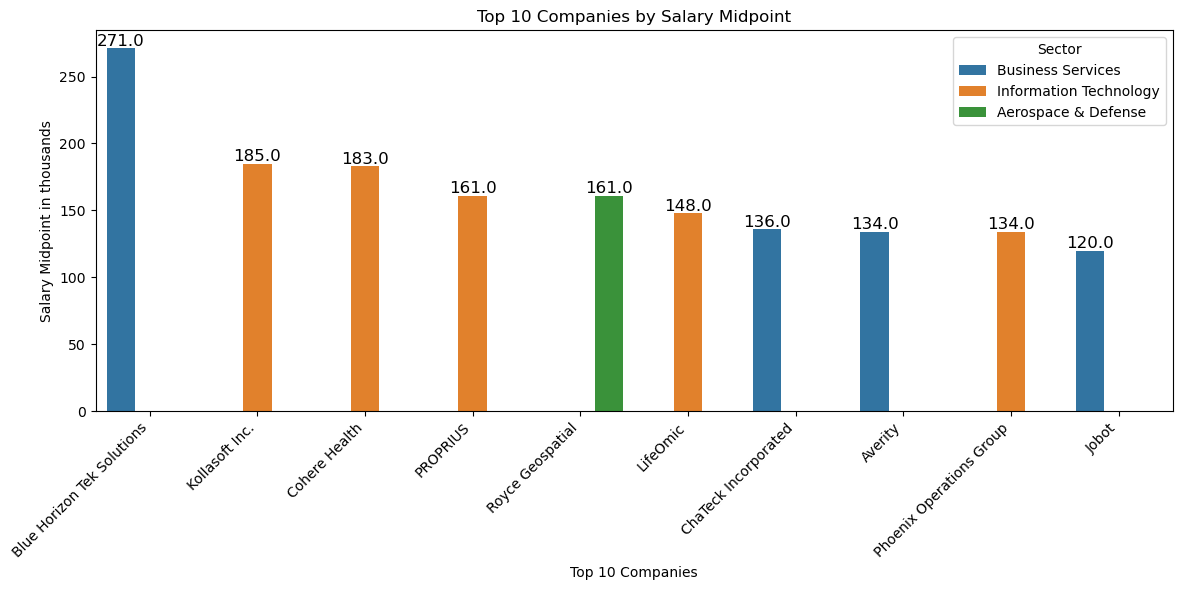

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Sector' column to string data type
df['Sector'] = df['Sector'].astype(str)

# Find the top 10 companies by maximum rating and salary midpoint
best_10_companies = df.groupby('Company Name').agg({'Rating': 'max', 'Salary Midpoint': 'max', 'Sector': 'first'}).nlargest(10, columns=['Rating', 'Salary Midpoint'])

# Create the bar plot with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=best_10_companies.index, y='Salary Midpoint', data=best_10_companies, hue='Sector')

# Add labels and title
plt.xlabel('Top 10 Companies')
plt.ylabel('Salary Midpoint in thousands')
plt.title('Top 10 Companies by Salary Midpoint')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha="right")

# Add "Company Name" as labels on the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.legend(title='Sector')
plt.show()


### Which Programs Are The Most Used 

In [21]:
python_number_of_users = df[df['python'] == 1].groupby('job_simp')['python'].sum()
excel_number_of_users = df[df['excel'] == 1].groupby('job_simp')['excel'].sum()
hadoop_number_of_users = df[df['hadoop'] == 1].groupby('job_simp')['hadoop'].sum()
spark_number_of_users = df[df['spark'] == 1].groupby('job_simp')['spark'].sum()
aws_number_of_users = df[df['aws'] == 1].groupby('job_simp')['aws'].sum()
tableau_number_of_users = df[df['tableau'] == 1].groupby('job_simp')['tableau'].sum()
big_data_number_of_users = df[df['big_data'] == 1].groupby('job_simp')['big_data'].sum()
sql_number_of_users = df[df['sql'] == 1].groupby('job_simp')['sql'].sum()
sas_number_of_users = df[df['sas'] == 1].groupby('job_simp')['sas'].sum()
java_number_of_users = df[df['java'] == 1].groupby('job_simp')['java'].sum()

# Using f-strings
print(f"Numbers of Python users: {python_number_of_users}")
print(f"Numbers of Excel users: {excel_number_of_users}")
print(f"Numbers of Hadoop users: {hadoop_number_of_users}")
print(f"Numbers of Spark users: {spark_number_of_users}")
print(f"Numbers of AWS users: {aws_number_of_users}")
print(f"Numbers of Tableau users: {tableau_number_of_users}")
print(f"Numbers of Big Data users: {big_data_number_of_users}")
print(f"Numbers of sql users: {sql_number_of_users}")
print(f"Numbers of sas users: {sas_number_of_users}")
print(f"Numbers of java users: {java_number_of_users}")


Numbers of Python users: job_simp
analyst            28
data engineer      38
data scientist    358
director            1
manager             3
mle                26
na                 28
Name: python, dtype: int64
Numbers of Excel users: job_simp
analyst            11
data engineer      14
data scientist    121
director            1
manager             3
mle                 5
na                 23
Name: excel, dtype: int64
Numbers of Hadoop users: job_simp
analyst             3
data engineer      19
data scientist    109
manager             1
mle                 3
na                  5
Name: hadoop, dtype: int64
Numbers of Spark users: job_simp
analyst             5
data engineer      21
data scientist    142
manager             1
mle                 5
na                 12
Name: spark, dtype: int64
Numbers of AWS users: job_simp
analyst             2
data engineer      26
data scientist    119
director            1
mle                14
na                 10
Name: aws, dtype: int64
N

### Vizualize Above Result

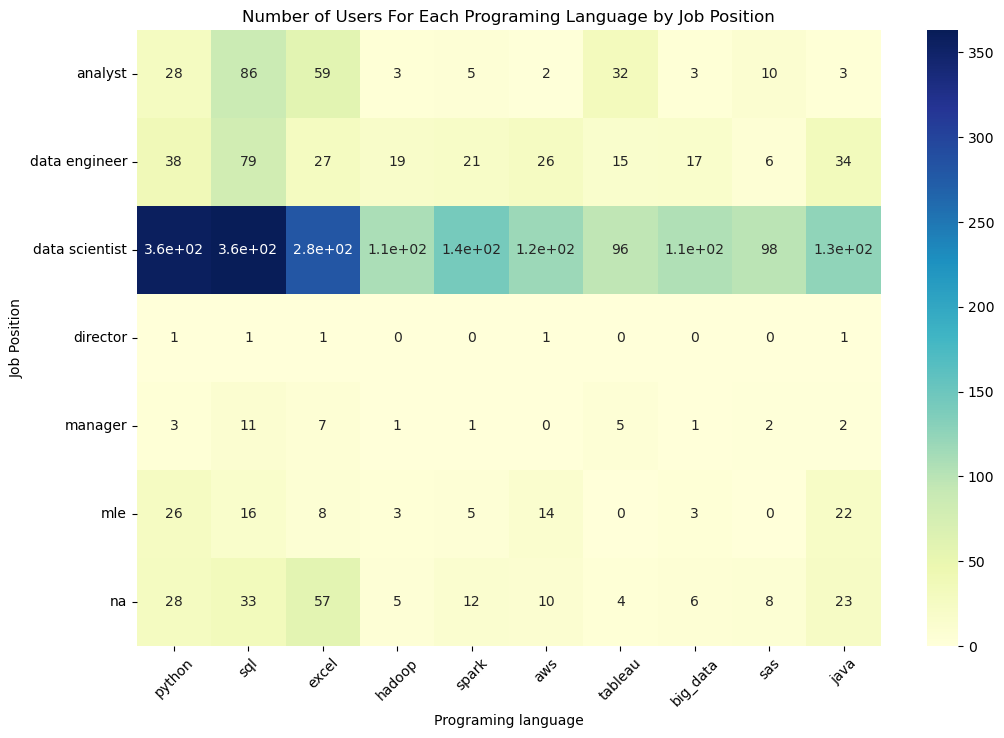

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to select the relevant columns
skills_columns = ['python', 'sql', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'sas', 'java']
filtered_df = df[['job_simp'] + skills_columns]

# Group by 'job_simp' and sum the skill counts for each job position
job_skills_counts = filtered_df.groupby('job_simp')[skills_columns].sum()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(job_skills_counts, annot=True, cmap='YlGnBu')
plt.xlabel('Programing language')
plt.ylabel('Job Position')
plt.title('Number of Users For Each Programing Language by Job Position')
plt.xticks(rotation=45)
plt.show()


### Creating A City Column

In [29]:
%%capture
try:
    # Split the 'Location' column and take the first element as the 'City'
    df['City'] = df['Location'].str.split(",").str[0]
except ValueError as e:
    print(f"ValueError: {e}")
    print("Printing rows with unexpected data in 'Location' column:")
    problematic_rows = df[df['Location'].str.count(',') != 1]
    print(problematic_rows)

# Display the DataFrame
print(df['City'])

### Companies With Most Revenues

In [17]:
companies_with_most_revenues = df.groupby('Company Name')['Revenue Avg'].sum().nlargest(10)
print(companies_with_most_revenues)

Company Name
AstraZeneca           100000
MassMutual             50000
Novartis               50000
Maxar Technologies     42000
Mars                   40000
Autodesk               22500
Apple                  20000
Biogen                 20000
GSK                    20000
Leidos                 20000
Name: Revenue Avg, dtype: int32


### Vizualize Above Result

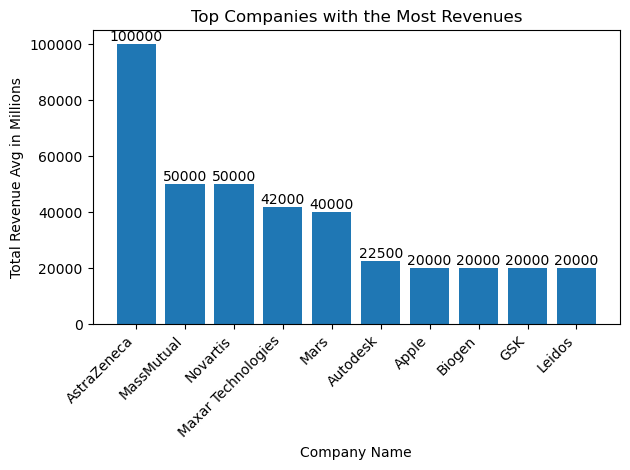

In [31]:
import matplotlib.pyplot as plt

# Assuming you have a Series companies_with_most_revenues containing the data
companies_with_most_revenues = df.groupby('Company Name')['Revenue Avg'].sum().nlargest(10)

# Create the bar plot
plt.bar(companies_with_most_revenues.index, companies_with_most_revenues.values)

# Add labels and title
plt.xlabel('Company Name')
plt.ylabel('Total Revenue Avg in Millions')
plt.title('Top Companies with the Most Revenues')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha="right")

# Add data points (values) on top of the bars
for i, v in enumerate(companies_with_most_revenues.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### Which Sector Has The Highest Salary In Which City

In [36]:
# First, filter out rows where 'Sector' is not equal to "-1"
filtered_df = df[df['Sector'] != "-1"]

# Then, group the filtered data by 'Sector' and find the city with the highest 'Salary Midpoint' in each group
city_with_highest_salary = filtered_df.groupby('Sector')['Salary Midpoint'].idxmax()

# Finally, extract the corresponding 'City' and 'Salary Midpoint' values
result_df = filtered_df.loc[city_with_highest_salary, ['Sector', 'City', 'Salary Midpoint']]

# Sort the result DataFrame by 'Salary Midpoint' column
result_df = result_df.sort_values(by='Salary Midpoint', ascending=False)

# Print the sorted result DataFrame
print(result_df)


                                 Sector           City  Salary Midpoint
509              Information Technology         Boston              271
499           Biotech & Pharmaceuticals     Pleasanton              271
501                   Business Services  United States              271
504                               Media        Seattle              271
511                   Consumer Services     Washington              271
503                 Aerospace & Defense        Herndon              271
305                           Insurance  San Francisco              185
304                             Finance        Atlanta              185
296                          Government         McLean              185
302                         Health Care     Fort Worth              185
286                              Retail         Monroe              183
279                       Manufacturing        Oshkosh              183
290                    Travel & Tourism       New York          

### Vizualize Above Result

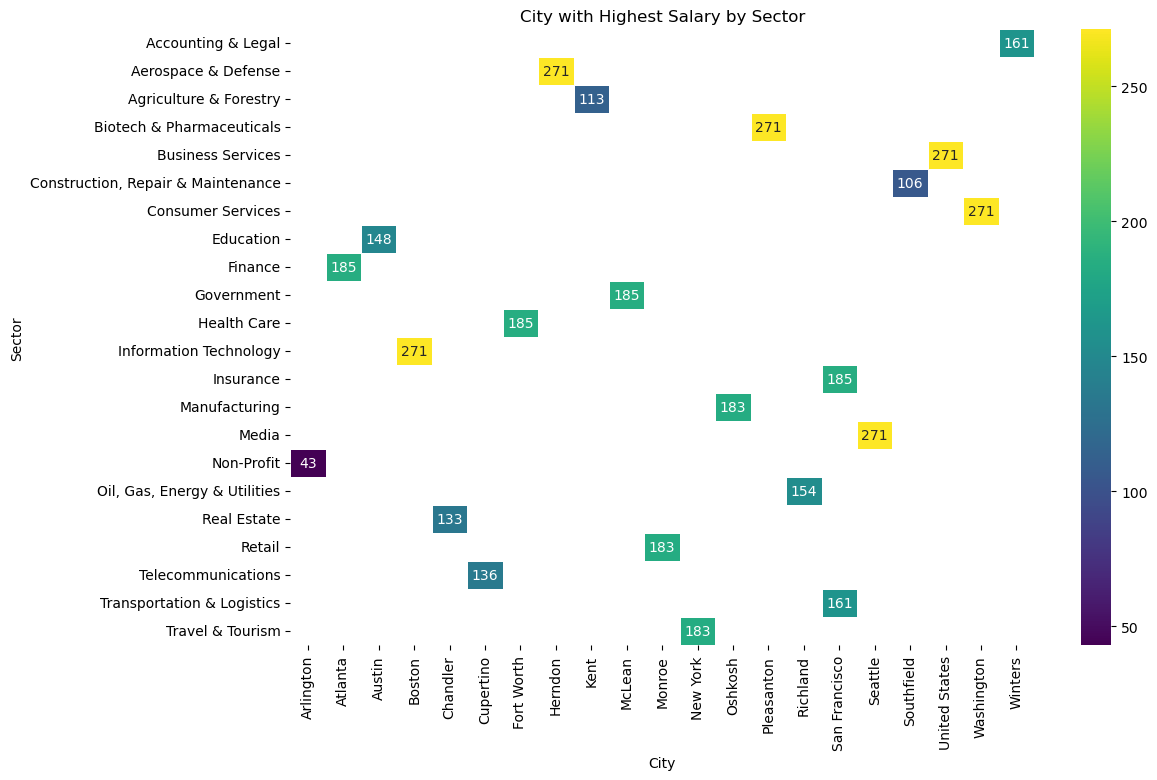

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, pivot the data to create a heatmap
heatmap_data = result_df.pivot(index='Sector', columns='City', values='Salary Midpoint')

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f", cbar=True, linewidths=0.5)
plt.xlabel('City')
plt.ylabel('Sector')
plt.title('City with Highest Salary by Sector')
plt.show()


### Which City Pays The Most Money 

In [15]:
which_location_pays_the_most = df.groupby('City')['Salary Midpoint'].max().nlargest(20)
print(which_location_pays_the_most)


City
Boston              271
Cambridge           271
Dayton              271
Fort Sam Houston    271
Herndon             271
Lexington Park      271
New York            271
Oklahoma City       271
Pleasanton          271
Raleigh             271
Seattle             271
United States       271
Washington          271
Wilmington          271
Ann Arbor           185
Atlanta             185
Cedar Rapids        185
Chicago             185
Cincinnati          185
Concord             185
Name: Salary Midpoint, dtype: int64


### Creating New Column Called "Revenue Avg"

In [30]:
revenue_mapping = {
    'Unknown / Non-Applicable': 0,
    '$100 to $500 million (USD)': (100 + 500) / 2,
    '$10+ billion (USD)': 10_000,
    '$2 to $5 billion (USD)': (2_000 + 5_000) / 2,
    '$10 to $25 million (USD)': (10 + 25) / 2,
    '$1 to $2 billion (USD)': (1_000 + 2_000) / 2,
    '$25 to $50 million (USD)': (25 + 50) / 2,
    '$50 to $100 million (USD)': (50 + 100) / 2,
    '$1 to $5 million (USD)': (1 + 5) / 2,
    '-1': 0,  # Handle the '-1' value as 0 
    '$500 million to $1 billion (USD)': (500 + 1_000) / 2,
    '$5 to $10 million (USD)': (5 + 10) / 2,
    'Less than $1 million (USD)': 0.5,
    '$5 to $10 billion (USD)': (5_000 + 10_000) / 2,
}

# Create the 'Revenue Avg' column by mapping the 'Revenue' column
df['Revenue Avg'] = df['Revenue'].map(revenue_mapping)

# Convert 'Revenue Avg' column to integers
df['Revenue Avg'] = df['Revenue Avg'].astype(int)

# Display the resulting DataFrame
print(df[['Revenue', 'Revenue Avg']])

                              Revenue  Revenue Avg
0            Unknown / Non-Applicable            0
1              $1 to $2 billion (USD)         1500
2          $100 to $500 million (USD)          300
3          $100 to $500 million (USD)          300
4            Unknown / Non-Applicable            0
5            Unknown / Non-Applicable            0
6                  $10+ billion (USD)        10000
7              $1 to $2 billion (USD)         1500
8              $2 to $5 billion (USD)         3500
9            Unknown / Non-Applicable            0
10         $100 to $500 million (USD)          300
11           Unknown / Non-Applicable            0
12   $500 million to $1 billion (USD)          750
13             $1 to $2 billion (USD)         1500
14         $100 to $500 million (USD)          300
15           Unknown / Non-Applicable            0
16   $500 million to $1 billion (USD)          750
17            $5 to $10 billion (USD)         7500
18           Unknown / Non-Appl

### Creating  Column Called "Cleaned Description" And Analyzing The Text From That Column 

In [19]:
# Clean the job descriptions and make them lowercase
df['Cleaned Description'] = df['Job Description'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Define a list of keywords to search for
keywords = ["data analyst", "sql", "excel", "tableau", "junior", "senior", "data scientist", "sas", "apache spark", "java", "data engineer", "manager"]


# Count the occurrences of keywords
keyword_counts = {}
for keyword in keywords:
    df[keyword] = df['Cleaned Description'].str.count(keyword)

# Sum the counts for each keyword
for keyword in keywords:
    keyword_counts[keyword] = df[keyword].sum()

# Convert keyword counts to a DataFrame
keyword_df = pd.DataFrame.from_dict(keyword_counts, orient='index', columns=['Count'])

# Sort the DataFrame by count in descending order
keyword_df = keyword_df.sort_values(by='Count', ascending=False)


### Analyzing the most common words appearing in "Cleaned description" column

In [32]:
junior_position = df['junior'].sum()
print(f"Junior appearing: {junior_position}")

senior_position = df['senior'].sum()
print(f"Senior appearing : {senior_position}")

data_scientist_position = df['data scientist'].sum()
print(f"Data Scientist appearing : {data_scientist_position}")

data_engineer_position = df['data engineer'].sum()
print(f"Data engineer appearing : {data_engineer_position}")

manager_position = df['manager'].sum()
print(f"Manager appearing : {manager_position}")



Junior appearing: 32
Senior appearing : 192
Data Scientist appearing : 828
Data engineer appearing : 170
Manager appearing : 120


### Which Sector Pays The Most 

In [35]:
salaries_by_sector = df[df['Sector'] != '-1'].groupby('Sector')['Salary Midpoint'].sum().nlargest(10)
print(salaries_by_sector)


Sector
Information Technology       21148
Business Services            15586
Biotech & Pharmaceuticals     8093
Aerospace & Defense           6094
Finance                       3586
Insurance                     3556
Manufacturing                 2830
Health Care                   2511
Government                    2283
Retail                        1051
Name: Salary Midpoint, dtype: int64


### Which Job Position Earns The Most 

In [37]:
# Sort the DataFrame by 'Salary Midpoint' in descending order
best_paid_jobs = df[['Job Title', 'Salary Midpoint']].sort_values(by='Salary Midpoint', ascending=False)

# Drop duplicates in the 'Job Title' column
best_paid_jobs = best_paid_jobs.drop_duplicates(subset='Job Title')

# Select the top N job titles (e.g., top 20)
top_n_jobs = best_paid_jobs.head(20)

# Print the top N job titles
print(top_n_jobs)


                                             Job Title  Salary Midpoint
513    Manager, Field Application Scientist, Southeast              271
519                                     Data Scientist              271
500                 Real World Science, Data Scientist              271
502        Data Scientist(s)/Machine Learning Engineer              271
503                              Senior Data Scientist              271
507  ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPU...              271
509                     Data Science Software Engineer              271
510             Scientist / Group Lead, Cancer Biology              271
514  COMPUTER SCIENTIST - ENGINEER - RESEARCH COMPU...              271
517                       Scientist - Machine Learning              271
499         Senior Principal Data Scientist (Python/R)              271
312                    Development Scientist, Voltaren              185
309        Analytics - Business Assurance Data Analyst          

### Which Company Has The Lowerst And Which One Has The Highest Salary For Senior Position 

In [105]:
senior_df = df[df['seniority'] == 'senior']
min_salary = senior_df['Salary Midpoint'].min()

# Filter the DataFrame to include only rows with the lowest salary
lowest_salary_rows = senior_df[senior_df['Salary Midpoint'] == min_salary]

# Get a list of all company names with the lowest salary
company_names = lowest_salary_rows['Company Name'].tolist()

print(f"The lowest salary for seniors is {min_salary} thousands at the following companies:")
print(company_names)



The lowest salary for seniors is 43 thousands at the following companies:
['Protolabs']


In [106]:
senior_df = df[df['seniority'] == 'senior']
max_salary = senior_df['Salary Midpoint'].max()

# Filter the DataFrame to include only rows with the highest salary
highest_salary_rows = senior_df[senior_df['Salary Midpoint'] == max_salary]

# Get a list of all company names with the highest salary
company_names = highest_salary_rows['Company Name'].tolist()

print(f"The highest salary for seniors is {max_salary} thousands at the following companies:")
print(company_names)


The highest salary for seniors is 271 thousands at the following companies:
['Roche', 'Maxar Technologies', 'Monte Rosa Therapeutics']
